In [76]:
import sys
import os
import pickle
import numpy as np
import time
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax


In [64]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True,
                                                  normalize=False)

# 각 데이터의 형상 출력
print(x_train.shape)  # (60000, 784)
print(t_train.shape)  # (60000,)
print(x_test.shape)  # (10000, 784)
print(t_test.shape)  # (10000,)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [ ]:
def get_data(pNormalize=False):
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(flatten=True, normalize=pNormalize, one_hot_label=False)
    return x_test, t_test


def init_network():
    with open("sample_weight.pkl", 'rb') as f:
        # 학습된 가중치 매개변수가 담긴 파일
        # 학습 없이 바로 추론을 수행
        network = pickle.load(f)

    return network


def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

def get_accuracy(network, batch_size):
    accuracy_cnt = 0
    error_indices = []
    
    start_time = time.time()
    for i in range(0, len(x), batch_size):
        x_batch = x[i:i+batch_size]
        y_batch = predict(network, x_batch)
        p = np.argmax(y_batch, axis=1)
        accuracy_cnt += np.sum(p == t[i:i+batch_size])
        errors = np.where(p != t[i:i+batch_size])[0]  # 현재 배치 내의 에러 인덱스
        error_indices.extend(errors + i)
        
    end_time = time.time()
    print("Accuracy:" + str(float(accuracy_cnt) / len(x)))
    print(f"Execution Time: {end_time - start_time:.4f} seconds")
    
    return end_time - start_time

In [70]:
x, t = get_data(pNormalize=False)
network = init_network()
batch_size = 100

get_accuracy(network, batch_size)

Accuracy:0.9207
Execution Time: 0.0755 seconds


/Users/chanshinpark/workspace/deepbottom/chapter3/../common/functions.py:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


0.0755009651184082

In [71]:
x, t = get_data(pNormalize=True)

get_accuracy(network, batch_size)

Accuracy:0.9352
Execution Time: 0.1947 seconds


0.19472789764404297

In [81]:
x, t = get_data(pNormalize=True)

execution_time = []
x_batch_size = (10, 100, 200, 600, 1000, 2000, 5000, 10000)
for batch_size in x_batch_size:
    execution_time.append(get_accuracy(network, batch_size))

Accuracy:0.9352
Execution Time: 0.2426 seconds
Accuracy:0.9352
Execution Time: 0.0635 seconds
Accuracy:0.9352
Execution Time: 0.0519 seconds
Accuracy:0.9352
Execution Time: 0.0487 seconds
Accuracy:0.9352
Execution Time: 0.0441 seconds
Accuracy:0.9352
Execution Time: 0.0432 seconds
Accuracy:0.9352
Execution Time: 0.0396 seconds
Accuracy:0.9352
Execution Time: 0.0431 seconds


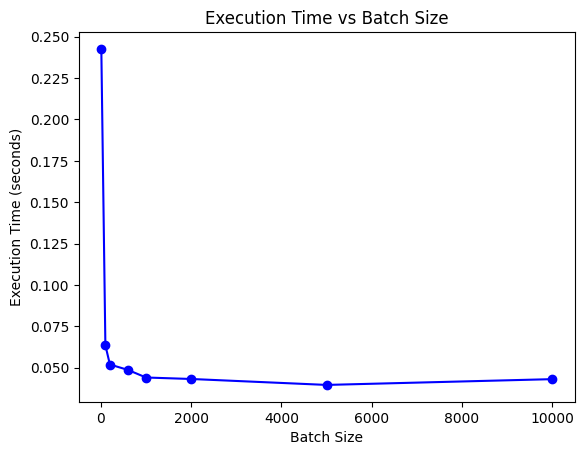

In [83]:
plt.plot(x_batch_size, execution_time, marker='o', linestyle='-', color='blue')
plt.title("Execution Time vs Batch Size")
plt.xlabel("Batch Size")
plt.ylabel("Execution Time (seconds)")
plt.show()